In [1]:
import torch
import torchvision

from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

### Load Data

In [2]:
data_transform = transforms.ToTensor()

train_data = FashionMNIST(root="./data",train=True, download=True, transform=data_transform)

test_data = FashionMNIST(root="./data",train=False,download=True,transform=data_transform)

In [3]:
print("No. of training data:",len(train_data) )
print("No. of testing data:",len(test_data))

No. of training data: 60000
No. of testing data: 10000


In [4]:
batch_size = 20

train_loader = DataLoader(train_data,batch_size=batch_size,shuffle=True)

test_loadet = DataLoader(test_data,batch_size=batch_size,shuffle=True)

classes = ["Tshirt","trouser",'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Visualize Data

(1, 28, 28)


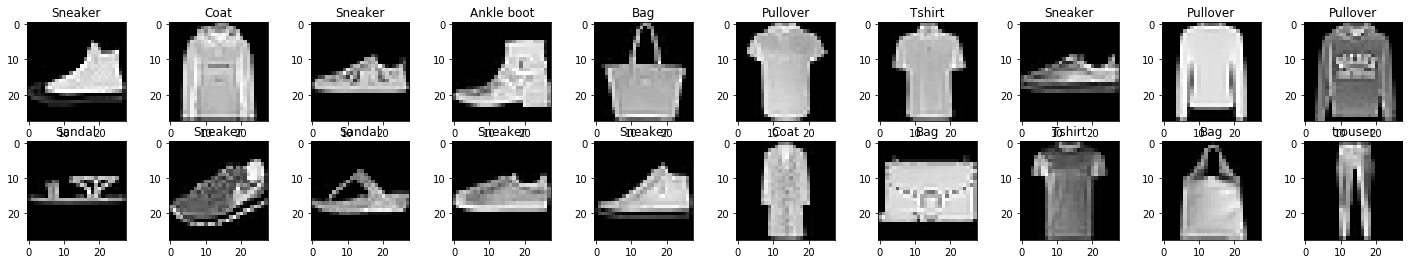

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)

images,labels = dataiter.next()

images = images.numpy()
print(images[0].shape)

fig = plt.figure(figsize=(25,4))

for idx in np.arange(batch_size):
    ax = fig.add_subplot(2,(batch_size)/2,idx+1)
    ax.imshow(np.squeeze(images[idx]),cmap="gray")
    ax.set_title(classes[labels[idx]])


In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.conv1 = nn.Conv2d(1,10,3)
        #input is (1,28,28) for output we have : (28-5)/1+1=24 i.e. (10,24,24) [where 28 = width,5=kernel size,/1 =strides]
        self.pool = nn.MaxPool2d(2,2)
        #output will be (20,12,12)
        
        self.conv2 = nn.Conv2d(10,20,3)
        #output will be(12-5)/1+1= 8 i.e. (32,8,8)
        #after another pool (32,4,4)
        
        self.fc1 = nn.Linear(20*5*5,50)
        self.fc1_drop = nn.Dropout(p=0.4)
        
        self.fc2 = nn.Linear(50,10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #now flattening is required for which
        
        x = x.view(x.size(0),-1)
        
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        
        x = self.fc2(x)
        
        return x
        

In [7]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [8]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(),lr= 0.001,momentum=0.9)

#### Variable wrapper gives pytorch ability to automatically track how input changes as it pases through network and automatically calculates gradient needed for backpropagation

In [9]:
from torch.autograd import Variable

We check accuracy before and after training

In [10]:
correct = 0 
total = 0 

for images,labels in test_loadet:
    
    images = Variable(images)
    
    outputs = net(images)
    
    _,predicted = torch.max(outputs.data,1) #max from each row i.e.1
    
    total += labels.size(0)
    #at each iteration batchsize is added
    correct+=(predicted == labels).sum()

accuracy = 100*correct.item()/total #.item gives exact float value else ans will seems like tensor[7]

print("Accuracy before training: ",accuracy)

Accuracy before training:  12.69


### Train

In [11]:
def train(n_epochs):
    loss_over_time = []
    
    for epoch in range(n_epochs):
        running_loss = 0.0
        for batch_i, data in enumerate(train_loader):
            inputs,labels = data
            
            inputs,labels = Variable(inputs),Variable(labels)
            #step1 zero the gradient for forward
            optimizer.zero_grad()
            #forward pass
            outputs = net(inputs)
            #loss nikalyo
            loss = criterion(outputs,labels)
            #backpropagate
            loss.backward()
            #update parameter
            optimizer.step()
            #calculate loss
            running_loss += loss.item()
            
            if batch_i % 1000 == 999:
                avg_loss = running_loss/1000
                loss_over_time.append(avg_loss)
                
                print("Epoch:{},Batch:{},Avg Loss:{}".format(epoch +1, batch_i+1,avg_loss ))
                running_loss = 0.0
    print("Training Finished")
    return loss_over_time

In [12]:
epochs = 10

training_loss = train(epochs) 

Epoch:1,Batch:1000,Avg Loss:1.5930582838058471
Epoch:1,Batch:2000,Avg Loss:0.9505240914523602
Epoch:1,Batch:3000,Avg Loss:0.8454731113314629
Epoch:2,Batch:1000,Avg Loss:0.7703686630427837
Epoch:2,Batch:2000,Avg Loss:0.7125185835957527
Epoch:2,Batch:3000,Avg Loss:0.6616394289433957
Epoch:3,Batch:1000,Avg Loss:0.6352301718592643
Epoch:3,Batch:2000,Avg Loss:0.6198956156969071
Epoch:3,Batch:3000,Avg Loss:0.5881163797676563
Epoch:4,Batch:1000,Avg Loss:0.5763330309167505
Epoch:4,Batch:2000,Avg Loss:0.5722681987285614
Epoch:4,Batch:3000,Avg Loss:0.5574867984503508
Epoch:5,Batch:1000,Avg Loss:0.541378621712327
Epoch:5,Batch:2000,Avg Loss:0.5433300818502903
Epoch:5,Batch:3000,Avg Loss:0.5166480644196272
Epoch:6,Batch:1000,Avg Loss:0.5236383465826512
Epoch:6,Batch:2000,Avg Loss:0.49471952264010904
Epoch:6,Batch:3000,Avg Loss:0.5052401297539473
Epoch:7,Batch:1000,Avg Loss:0.4912689428925514
Epoch:7,Batch:2000,Avg Loss:0.4819074418395758
Epoch:7,Batch:3000,Avg Loss:0.48601251962035896
Epoch:8,Batc

#### Loss Visualization:


<function matplotlib.pyplot.show(*args, **kw)>

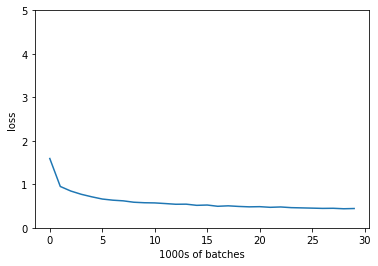

In [14]:
plt.plot(training_loss)
plt.xlabel("1000s of batches")
plt.ylabel("loss")
plt.ylim(0,5)
plt.show

### Testing Trained Model:

In [15]:
test_loss = torch.zeros(1)
print(test_loss)
class_correct = list(0.for i in range(10))
print(class_correct)

tensor([0.])
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [16]:
class_total = list(0. for i in range(10))

net.eval()

for batch_i,data in enumerate(test_loadet):

    inputs,label = data
    #inputs,label = Variable(inputs),Variable(label)
    
    outputs = net(inputs)
    
    loss = criterion(outputs,label)
    
    test_loss += ((torch.ones(1)/(batch_i+1))* (loss.data-test_loss))
    
    _,predicted = torch.max(outputs.data,1)
    
    correct = np.squeeze(predicted.eq(label.data.view_as(predicted)))
    
    for i in range(batch_size):
        labels = label.data[i]
        class_correct[labels] += correct[i].item()
        
        class_total[labels] += 1
print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.403111

Test Accuracy of Tshirt: 77% (775/1000)
Test Accuracy of trouser: 96% (968/1000)
Test Accuracy of Pullover: 72% (722/1000)
Test Accuracy of Dress: 86% (869/1000)
Test Accuracy of  Coat: 83% (830/1000)
Test Accuracy of Sandal: 94% (942/1000)
Test Accuracy of Shirt: 57% (579/1000)
Test Accuracy of Sneaker: 96% (962/1000)
Test Accuracy of   Bag: 95% (959/1000)
Test Accuracy of Ankle boot: 95% (952/1000)

Test Accuracy (Overall): 85% (8558/10000)


### visualize sample test result

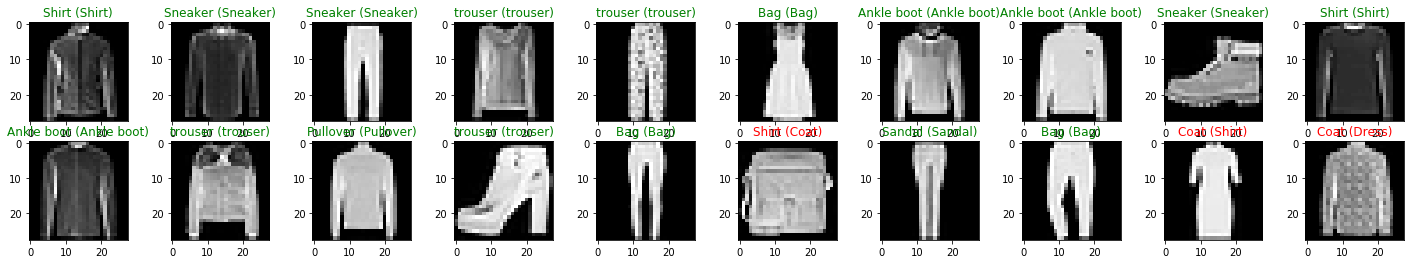

In [38]:
dataiter = iter(test_loadet)

image,label = dataiter.next()

pred = net(image).data.max(1)[1].numpy()
#(1) mean check max in row and [1] represents indicies as it has two values 0=values and 1= indices
fig = plt.figure(figsize=(25,4))

for idx in np.arange(batch_size):
    ax = fig.add_subplot(2,batch_size/2,idx+1)
    ax.imshow(np.squeeze(image[idx]),cmap="gray")
    ax.set_title("{} ({})".format(classes[pred[idx]],classes[label[idx]]),
                                 color=("green" if pred[idx] == label[idx] else "red"))

In [30]:
np.squeeze(net(image).data.max(1,keepdim=True)[1])

tensor([7, 4, 4, 0, 4, 5, 1, 4, 2, 6, 9, 6, 9, 0, 8, 6, 6, 7, 0, 9])

In [37]:
net(image).data.max(1)

torch.return_types.max(
values=tensor([10.9086,  8.9141,  7.4183, 22.8180,  4.4457, 17.8491,  7.3899,  9.9672,
        12.1828,  8.2536, 14.9725,  7.4434, 10.9820,  6.0968,  5.8734, 23.9267,
         4.6936, 14.5147, 22.7519,  4.8632]),
indices=tensor([0, 6, 8, 1, 6, 9, 0, 4, 3, 4, 8, 4, 3, 2, 6, 5, 8, 8, 1, 4]))

### Visualize Feature Vector:

In [40]:
weights = net.conv1.weight

In [41]:
weights

Parameter containing:
tensor([[[[ 0.7920,  0.7094, -0.2166],
          [ 0.1650,  0.2759,  0.6556],
          [ 0.2207,  0.2678,  0.3060]]],


        [[[ 0.1660, -0.3100,  0.3438],
          [-0.3517, -0.2756,  0.5347],
          [-0.2886,  0.2348, -0.1057]]],


        [[[-0.2536, -0.2663,  0.0817],
          [ 0.2407,  0.1700,  0.2225],
          [-0.2027, -0.1005, -0.0824]]],


        [[[-0.0181, -0.4773, -0.3141],
          [-0.0572, -0.2492,  0.3182],
          [ 0.0517,  0.2443, -0.2494]]],


        [[[ 0.4738,  0.6895,  0.9325],
          [ 0.6417,  0.4712,  0.0335],
          [ 0.4934,  0.5636,  0.1377]]],


        [[[ 0.6317, -0.0544, -0.9221],
          [ 0.7477,  0.1005, -1.0489],
          [ 0.4308,  0.5037, -0.7533]]],


        [[[ 0.0468,  0.2376,  0.1187],
          [ 0.2191,  0.5233,  0.1452],
          [ 0.1785,  0.6317, -0.2995]]],


        [[[ 0.6130,  0.9895,  0.8009],
          [-0.0798,  0.5962,  0.1622],
          [-0.3073,  0.2904,  0.4181]]],


        [[

In [47]:
weights.data.numpy().shape

(10, 1, 3, 3)

First conv


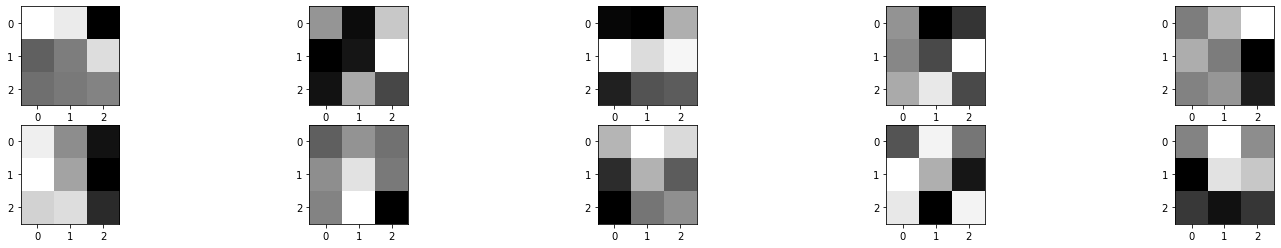

In [60]:
w = net.conv1.weight.data
w = w.numpy()

fig = plt.figure(figsize=(25,4))

#we see for 10 filters
column = 5
row = 2

for i in range(0,column*row):
    fig.add_subplot(row,column,i+1)
    plt.imshow(w[i][0],cmap="gray")
    
print("First conv")
plt.show()

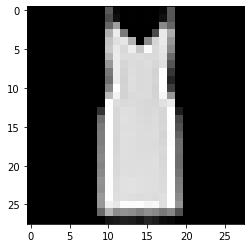

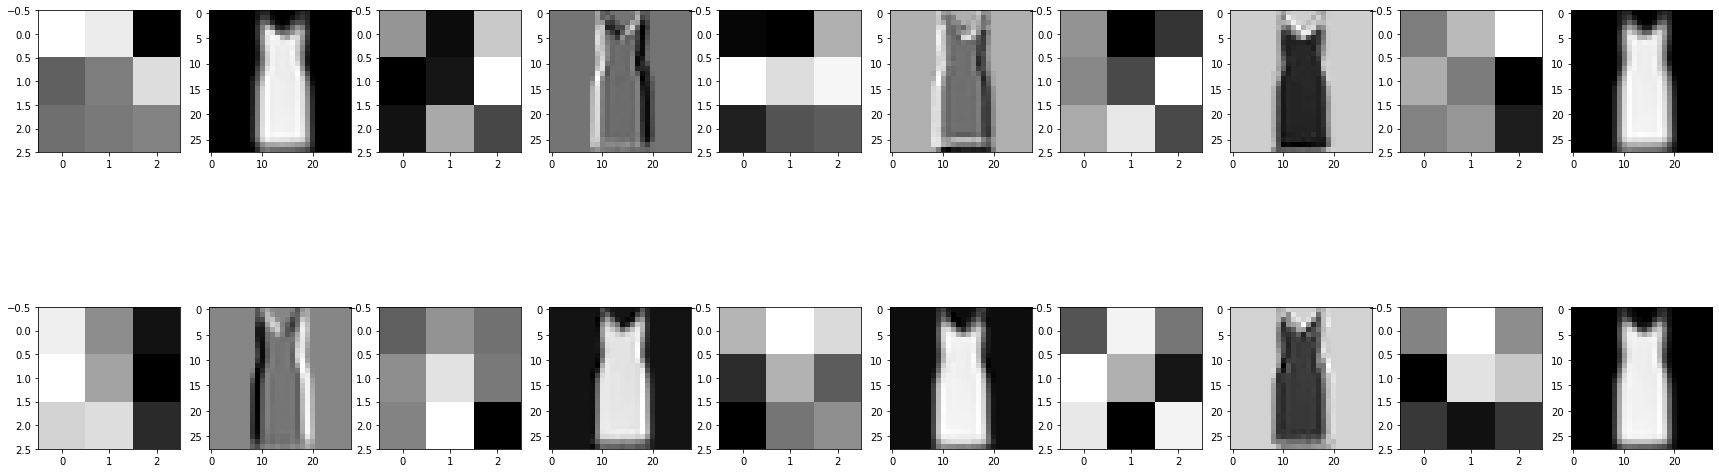

In [62]:
dataiter = iter(test_loadet)
image,label = dataiter.next()
image=image.numpy()

idx= 10
img=np.squeeze(image[idx])

import cv2
plt.imshow(img, cmap='gray')
fig=plt.figure(figsize=(30, 10))
column = 5*2
row =2

for i in range(0,column*row):
    fig.add_subplot(row,column,i+1)
    
    if(i%2)==0:
        plt.imshow(w[int(i/2)][0],cmap="gray")
        
    else:
       
        c = cv2.filter2D(img, -1, w[int((i-1)/2)][0])
        plt.imshow(c,cmap="gray")
plt.show()


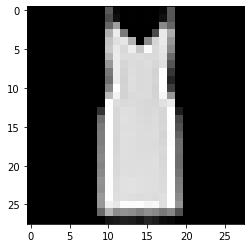

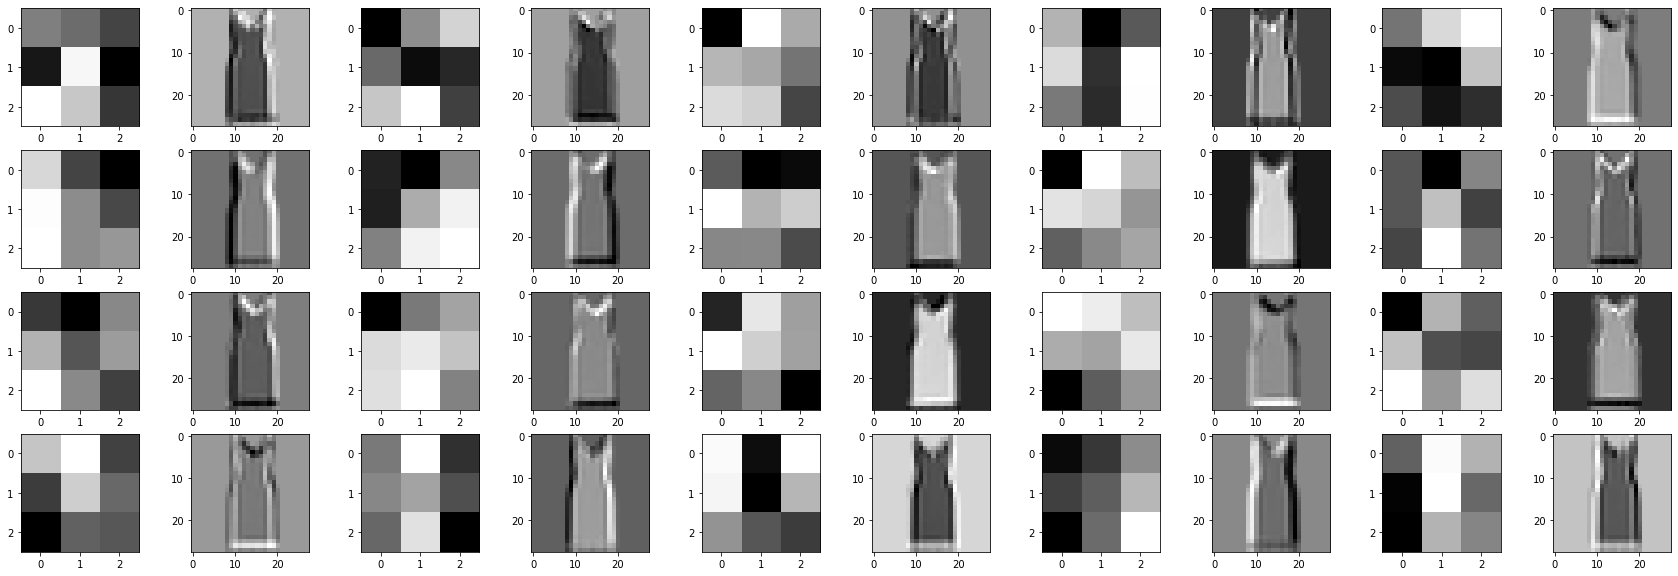

In [69]:
#for second conv layer

plt.imshow(img,cmap="gray")

column = 5*2
row = 2*2
fig= plt.figure(figsize=(30,10))

weights = net.conv2.weight.data
w = weights.numpy()

for i in range(0,column*row):
    fig.add_subplot(row,column,i+1)
    if(i%2)==0:
        plt.imshow(w[int(i/2)][0],cmap="gray")
    else:
        c = cv2.filter2D(img,-1,w[int((i-1)/2)][0])
        plt.imshow(c,cmap="gray")
plt.show()